In [1]:
#Import library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import pyplot

Load Data

In [2]:
url = 'https://raw.githubusercontent.com/rdazmn/FYP/master/ML-MATT-CompetitionQT1920_train2.csv'
url2 = 'https://raw.githubusercontent.com/rdazmn/FYP/master/ML-MATT-CompetitionQT1920_test.csv'
data = pd.read_csv(url, error_bad_lines=False)
data_test =pd.read_csv(url2,error_bad_lines=False)


In [3]:
data.shape

(36904, 14)

In [4]:
data.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


Downlink definition – signal coming from a cell tower to your cellular device

Uplink definition – signal leaving your cellular device and going back to a cell tower

Most of us have experienced cell phone conversations when you can hear the other person but they can’t hear you or vice versa. 
A disruption in downlink or uplink in cellular communication causes this issue.

Imputation - drop rows or column include missing values

In [5]:
#Change object to float64

data['Time'] = pd.to_datetime(data['Time'],format='%H:%M').dt.hour
data['maxUE_UL_DL'] = pd.to_numeric(data['maxUE_UL_DL'],errors='coerce')
data['maxUE_DL'] = data['maxUE_DL'].replace(np.nan, 0)
data['maxUE_UL'] = data['maxUE_UL'].replace(np.nan, 0)
data['maxUE_UL_DL'] = data['maxUE_UL_DL'].replace('#¡VALOR!',0)
data['maxUE_UL_DL'] = data['maxUE_UL_DL'].replace(np.nan,0)



In [6]:
data.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
0,10,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7.0,1
1,9,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10.0,1
2,7,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2.0,1
3,2,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4.0,1
4,3,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3.0,0


In [7]:
#Filling all missing values with 0
data = data.fillna(0)
#Filling missing values with medians of the columns
data = data.fillna(data.median())

In [8]:
data.isna().any()

Time           False
CellName       False
PRBUsageUL     False
PRBUsageDL     False
meanThr_DL     False
meanThr_UL     False
maxThr_DL      False
maxThr_UL      False
meanUE_DL      False
meanUE_UL      False
maxUE_DL       False
maxUE_UL       False
maxUE_UL_DL    False
Unusual        False
dtype: bool

Handling Outliers - Outlier technique

#PRBUsage UL

In [9]:
#The actual maximum threshold of PRBUsageUL is
maxThrUL = data['PRBUsageUL'].quantile(0.95)
maxThrUL

25.768

In [10]:
#This indicate the outlier of each PRBUsageUL value which more than max threshold
data[data['maxThr_UL']>maxThrUL]

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
110,0,6BLTE,18.593,11.014,5.302,0.565,57.651,45.350,1.233,0.01,5.0,4.0,9.0,0
225,17,6BLTE,16.067,6.568,2.816,0.324,57.454,38.727,1.223,0.01,5.0,4.0,9.0,0
268,12,6BLTE,12.935,4.378,2.156,0.286,51.421,45.151,1.124,0.01,5.0,3.0,8.0,1
275,10,6BLTE,21.018,8.993,4.384,0.545,57.248,43.766,1.243,0.01,5.0,4.0,9.0,0
290,0,6BLTE,19.705,7.579,3.122,0.292,55.700,44.178,1.273,0.01,5.0,4.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36612,10,6CLTE,12.227,1.011,0.221,0.995,17.109,30.519,1.172,0.01,4.0,3.0,7.0,0
36662,7,6BLTE,3.781,3.383,3.185,0.489,63.694,45.997,1.015,0.01,3.0,2.0,5.0,1
36789,18,6BLTE,21.625,9.297,4.618,0.554,54.910,42.259,1.293,0.01,5.0,5.0,10.0,0
36814,17,6BLTE,15.663,4.850,2.617,0.317,67.291,44.631,1.172,0.01,5.0,3.0,8.0,0


In [11]:
#The actual maximum threshold of PRBUsageUL is
minThrUL = data['PRBUsageUL'].quantile(0.05)
minThrUL

0.10099999999999999

In [12]:
data[data['meanThr_UL']<minThrUL]

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
0,10,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7.0,1
2,7,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2.0,1
3,2,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4.0,1
4,3,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3.0,0
5,13,9ALTE,15.966,1.819,0.415,0.071,10.116,0.706,1.364,1.314,6.0,5.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,21,6ALTE,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,3.0,7.0,0
36900,9,8CLTE,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,2.0,6.0,0
36901,13,9BLTE,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,3.0,7.0,1
36902,12,3CLTE,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,4.0,9.0,0


In [13]:
#The actual maximum threshold of PRBUsageDL is
maxThrDL = data['PRBUsageDL'].quantile(0.95)
maxThrDL

6.07

In [14]:
#The actual maximum threshold of PRBUsageUL is
minThrDL = data['PRBUsageDL'].quantile(0.05)
minThrDL

0.40399999999999997

In [15]:
data2 =data[(data['PRBUsageUL']<maxThrUL) & (data['PRBUsageUL']>minThrUL) & (data['PRBUsageDL']<maxThrDL) & (data['PRBUsageDL']>minThrUL) ]
data2.shape

(31500, 14)

In [16]:
data2.sample(10)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
33868,10,1BLTE,17.313,1.692,0.657,0.078,54.284,0.837,1.234,1.045,6.0,3.0,9.0,1
29556,20,3BLTE,16.269,2.728,0.745,0.090,56.242,0.900,1.384,1.182,6.0,5.0,11.0,0
17915,11,1CLTE,21.492,5.771,3.040,0.117,52.980,0.863,1.373,1.184,6.0,7.0,13.0,1
34724,16,10BLTE,6.366,0.707,0.124,0.026,13.836,0.732,1.101,1.031,4.0,3.0,7.0,0
4555,12,1BLTE,14.349,2.425,1.089,0.063,61.649,0.647,1.233,1.061,5.0,4.0,9.0,0
11960,11,6BLTE,24.959,5.356,1.592,0.095,29.580,0.866,1.334,0.010,7.0,5.0,12.0,0
1520,2,1ALTE,5.373,0.995,0.274,0.034,15.353,1.984,1.055,1.005,3.0,2.0,5.0,1
10332,20,8BLTE,9.802,1.920,0.700,0.055,35.621,0.725,1.172,1.051,4.0,3.0,7.0,0
1594,3,5BLTE,6.467,0.606,0.157,0.021,4.108,0.394,1.051,1.031,3.0,3.0,6.0,0
33065,5,10CLTE,1.314,0.404,0.014,0.006,0.112,0.062,1.021,1.011,2.0,2.0,4.0,0


Change cellname to one hot encoder

In [17]:
#pd.get_dummies(data2, columns=["CellName"]).head(10)

TestML

In [18]:
X = data2.iloc[:,2:13]
y = data2.iloc[:,13]
y = y.astype('int')

#Split into train and test set using sklearn model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.686818 (0.010844)
LDA: 0.673951 (0.011806)
KNN: 0.697898 (0.015038)
CART: 0.947779 (0.005626)
SVM: 0.758389 (0.014938)
XGB: 0.999751 (0.000197)
RF: 0.980839 (0.002405)


Calculate the accuracy of the algorithms:

a) Random forest classifier

In [22]:
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = rclf.predict(X_test)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))


Accuracy: 93.59%


b) Decision tree classifier

In [23]:
clf=DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))


Accuracy: 96.17%


c) XGB

In [24]:
xgb =XGBClassifier()
xgb= xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:  %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy:  99.57%


Evaluate XGBoost Model with Learning curve

[0]	validation_0-error:0.14353	validation_0-logloss:0.54649	validation_1-error:0.14444	validation_1-logloss:0.54739
[1]	validation_0-error:0.14071	validation_0-logloss:0.46958	validation_1-error:0.14175	validation_1-logloss:0.47195
[2]	validation_0-error:0.14083	validation_0-logloss:0.41926	validation_1-error:0.14206	validation_1-logloss:0.42138
[3]	validation_0-error:0.13361	validation_0-logloss:0.38287	validation_1-error:0.13476	validation_1-logloss:0.38428
[4]	validation_0-error:0.13127	validation_0-logloss:0.36550	validation_1-error:0.13206	validation_1-logloss:0.36714
[5]	validation_0-error:0.13071	validation_0-logloss:0.34514	validation_1-error:0.13143	validation_1-logloss:0.34702
[6]	validation_0-error:0.12540	validation_0-logloss:0.32469	validation_1-error:0.12476	validation_1-logloss:0.32597
[7]	validation_0-error:0.12448	validation_0-logloss:0.31568	validation_1-error:0.12429	validation_1-logloss:0.31865
[8]	validation_0-error:0.11667	validation_0-logloss:0.30136	validation_1

[71]	validation_0-error:0.00599	validation_0-logloss:0.04038	validation_1-error:0.00714	validation_1-logloss:0.04666
[72]	validation_0-error:0.00599	validation_0-logloss:0.03975	validation_1-error:0.00714	validation_1-logloss:0.04595
[73]	validation_0-error:0.00591	validation_0-logloss:0.03915	validation_1-error:0.00714	validation_1-logloss:0.04540
[74]	validation_0-error:0.00591	validation_0-logloss:0.03901	validation_1-error:0.00714	validation_1-logloss:0.04531
[75]	validation_0-error:0.00587	validation_0-logloss:0.03807	validation_1-error:0.00714	validation_1-logloss:0.04433
[76]	validation_0-error:0.00528	validation_0-logloss:0.03626	validation_1-error:0.00667	validation_1-logloss:0.04240
[77]	validation_0-error:0.00512	validation_0-logloss:0.03521	validation_1-error:0.00651	validation_1-logloss:0.04126
[78]	validation_0-error:0.00460	validation_0-logloss:0.03415	validation_1-error:0.00635	validation_1-logloss:0.04016
[79]	validation_0-error:0.00436	validation_0-logloss:0.03309	val

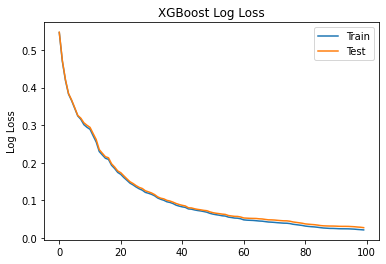

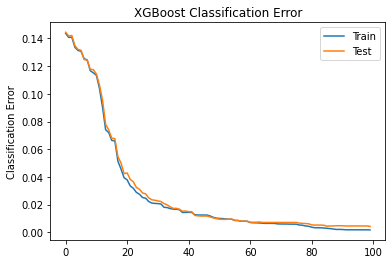

In [25]:
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

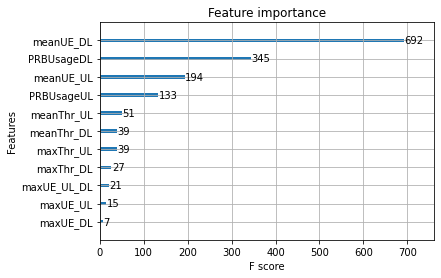

In [26]:
from xgboost import plot_importance

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

By plot these scores on a bar chart directly to get a visual indication of the relative importance of each feature in the dataset.

F score in the feature importance context simply means the number of times a feature is used to split the data across all trees. at least, if you are using the built-in feature of Xgboost.

In [27]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.004, n=11, Accuracy: 99.57%
Thresh=0.005, n=10, Accuracy: 99.52%
Thresh=0.005, n=9, Accuracy: 99.59%
Thresh=0.005, n=8, Accuracy: 99.63%
Thresh=0.009, n=7, Accuracy: 99.60%
Thresh=0.036, n=6, Accuracy: 99.65%
Thresh=0.075, n=5, Accuracy: 99.62%
Thresh=0.084, n=4, Accuracy: 99.48%
Thresh=0.095, n=3, Accuracy: 99.90%
Thresh=0.281, n=2, Accuracy: 90.13%
Thresh=0.400, n=1, Accuracy: 71.11%


 Test multiple thresholds for selecting features by feature importance. Specifically, the feature importance of each input variable, essentially allow to test each subset of features by importance, starting with all features and ending with a subset with the most important feature.